In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pyparsing import python_style_comment
from itertools import islice
import scipy.sparse as sps
from scipy.sparse import diags
from functools import lru_cache
import pandas as pd

# More Power Ratio
Values matched for BPPM photon number and PPM time bin
<br>5,5 
<br>6,8 
<br>7,11 
<br>8,14 (exact)
<br>9,18 
<br>10,24 (exact)
<br>11,30 (exact)
<br>12,38 (exact)
<br>13,47 (exact)

In [3]:
@lru_cache(maxsize=None)
def compute_N(n_BPPM):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 102))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n_BPPM]

def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M, n_PPM):
    return math.factorial((int(M))) / (math.factorial((int(M - n_PPM))) * math.factorial((int(n_PPM))))

def power_BPPM(n_BPPM,N_n):
    power = n_BPPM / N_n
    return power

def power_PPM(n_BPPM,compute_M):
   n_PPM = 1
   power  = n_PPM/ compute_M
   return power

def Compute_G_n(n_General):
    return n_General

def compute_T_General(n_General, M):
  T_General = compute_M(M) * n_General
  return T_General


def power_General(Compute_G_n, compute_T_General): 
   power = Compute_G_n / compute_T_General
   return power

In [4]:
df_power_BPPM = pd.DataFrame(columns=['Photon Number_BPPM', 
                                     'Time Bin_BPPM',
                                     'Power Ratio of BPPM',
                                     'Time Bin_PPM',
                                     'Power Ratio_PPM',
                                     'Time Bin_General_2',
                                     'Power Ratio_General_2',
                                     'Time Bin_General_3',
                                     'Power Ratio_General_3'
                                     ]
                                 )

for n in range(1,101):
    N_n = compute_N(n)
    M = compute_M(n)
    Power_BPPM_val = power_BPPM(n, N_n)
    Power_PPM_val = power_PPM(n,M)
    TimeBin_General_2 = compute_T_General(2, M)
    TimeBin_General_3 = compute_T_General(3, M)
    Power_General_2_val = power_General(Compute_G_n(2), compute_T_General(2, M))
    Power_General_3_val = power_General(Compute_G_n(3), compute_T_General(3, M))
    # codeword_PPM_val = codeword_PPM(EpI_BPPM(n_BPPM))
    # codeword_TimeBin_General_val = codeword_TimeBin_General(2, EpI_BPPM(n_BPPM))
    df_power_BPPM.loc[n-1] = [n, N_n, Power_BPPM_val, M, Power_PPM_val, TimeBin_General_2, Power_General_2_val, TimeBin_General_3, Power_General_3_val]
    

In [5]:
df_power_BPPM

,Photon Number_BPPM,Time Bin_BPPM,Power Ratio of BPPM,Time Bin_PPM,Power Ratio_PPM,Time Bin_General_2,Power Ratio_General_2,Time Bin_General_3,Power Ratio_General_3
0,1.0,1.0,1.000000,1.0,1.000000,2.0,1.000000,3.0,1.000000
1,2.0,3.0,0.666667,2.0,0.500000,4.0,0.500000,6.0,0.500000
2,3.0,7.0,0.428571,3.0,0.333333,6.0,0.333333,9.0,0.333333
3,4.0,14.0,0.285714,4.0,0.250000,8.0,0.250000,12.0,0.250000
4,5.0,26.0,0.192308,5.0,0.200000,10.0,0.200000,15.0,0.200000
...,...,...,...,...,...,...,...,...,...
95,96.0,696175.0,0.000138,96.0,0.010417,192.0,0.010417,288.0,0.010417
96,97.0,722246.0,0.000134,97.0,0.010309,194.0,0.010309,291.0,0.010309
97,98.0,748926.0,0.000131,98.0,0.010204,196.0,0.010204,294.0,0.010204
98,99.0,776527.0,0.000127,99.0,0.010101,198.0,0.010101,297.0,0.010101


In [6]:
# df_power_BPPM.to_excel('power_ratio.xlsx', index=False)

# BPPM

In [7]:
comb_cache = {}
comb_n_cache = {}
comb_n_M_minus_n_cache = {}

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N

def combination(n, r):
    if (n, r) in comb_cache:
        return comb_cache[(n, r)]
    else:
        comb = math.factorial(n) // (math.factorial(n-r) * math.factorial(r))
        comb_cache[(n, r)] = comb
        return comb
    
@lru_cache(maxsize=None)
def compute_N(n):
  def agen(): # generator of terms
      aset, sset, k = set(), set(), 0
      while True:
          k += 1
          while any(k+an in sset for an in aset): k += 1
          yield k; sset.update(k+an for an in aset); aset.add(k)
  a = list(islice(agen(), 100))
  photon = list(map(lambda v: v-1, a))
  compute_N= [sum(photon[:i]) for i in range(1,len(photon)+1)]
  return compute_N[n]

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute(n, P_l, l):
    if (n, l) in comb_n_cache:
        comb_n = comb_n_cache[(n, l)]
    else:
        comb_n = combination(n, l)
        comb_n_cache[(n, l)] = comb_n

    return comb_n * (P_l)**l * (1 - P_l)**(n - l)

def Add_Distribute(n, P_a, a):
    N_n = compute_N(n)
    M_minus_n = compute_N(n) - N_n
    if (N_n, M_minus_n, a) in comb_n_M_minus_n_cache:
        comb_Nn_Mn = comb_n_M_minus_n_cache[(N_n, M_minus_n, a)]
    else:
        comb_Nn_Mn = combination(N_n + M_minus_n, a)
        comb_n_M_minus_n_cache[(N_n, M_minus_n, a)] = comb_Nn_Mn

    return comb_Nn_Mn * (P_a)**a * (1 - P_a)**(M_minus_n - a)

# define a separate function for computing the probability of error
def P_err(n, P_l, P_a,l,a):
  return Loss_Distribute(n,P_l,l) * Add_Distribute(n,P_a, a)
  #return combination(n,l) * (P_l)**l*(1-P_l)**(n-l) * combination(N-n,a) * (P_a)**a*(1-P_a)**(N-n-a) 

# We put these into P_D for re-normalization, These are the probability of error we can correct
# define separate functions for computing the probability of success
def P_Success0(n,P_l,P_a,l,a):
  return P_err(n,P_l, P_a,0,0)

def P_Success1(n,P_l,P_a,l,a):
  P0 = P_Success0(n, P_l, P_a,l,a)
  P1 = P_err(n, P_l, P_a, l=0, a=1) + P_err(n, P_l, P_a, l=1, a=0)
  return P0 + P1

def P_Success2(n,P_l,P_a,l,a):
  P1 = P_Success1(n, P_l, P_a)
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  return P1 + P2

def P_Success3(n,P_l,P_a,l,a):
  P2 = P_err(n, P_l, P_a, l=1, a=1) + P_err(n, P_l, P_a, l=2, a=0) + P_err(n, P_l, P_a, l=0, a=2)
  P3 = P_err(n, P_l, P_a,1,2) + P_err(n, P_l, P_a, 2,1) + P_err(n, P_l, P_a,3,0) + P_err(n, P_l, P_a,0,3)
  return P2 + P3

def P_D(n,P_l,P_a,l,a):
# we only consider at most 1 error, i.e. P_0 + P_1
  return 1 - P_Success1(n,P_l,P_a,l,a)

In [8]:
def P_AB_BPPM_diagonal(n, P_D):
    factorial_n = math.factorial(n)
    diag_data = (1/factorial_n) * (1-P_D) 
    # matrix = sps.dia_matrix((diag_data, 0), shape=(factorial_n, factorial_n))
    return diag_data

def P_A_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for row in P_AB_BPPM_diagonal]
    else:
        return [1/(1-P_D) * sum(row) for row in P_AB_BPPM_diagonal] 
# sum over the elements in columns in the probability matrix P_AB
# renormalized in P_AB already

def P_B_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    if P_D == 1:
        return [1 for col in zip(*P_AB_BPPM_diagonal)]
    else:
        return [1/(1-P_D) * sum(col) for col in zip(*P_AB_BPPM_diagonal)]

def H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    P_AB_BPPM_diagonal = np.where(P_AB_BPPM_diagonal == 0, 1e-9, P_AB_BPPM_diagonal)  # replace zero values with 1e-9
    H = - factorial_n * (P_AB_BPPM_diagonal * np.log2(np.where(P_AB_BPPM_diagonal == 0, 1, P_AB_BPPM_diagonal))).sum()
    return H
    
def I_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D):
    factorial_n = math.factorial(n)
    H_AB_BPPM_diag = H_AB_BPPM_diagonal(P_AB_BPPM_diagonal, P_D)
    I_AB = H_AB_BPPM_diag *(1-P_D) 
    return I_AB

# PPM

M_minus_n_PPM is used to represent the number of elements that are not in the set of n_PPM elements. In the context of this code, M_minus_n_PPM is used to compute the number of elements in the "add" set, which is the set of elements not in the "loss" set.

By subtracting n_PPM from M, we get the number of elements not in the "loss" set. Then, we can use this value along with the number of elements in the "add" set to compute the probabilities of error and success.


In [9]:
def compute_M(n_BPPM):
  return n_BPPM

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_PPM(M_PPM, n_PPM):
    return math.factorial((int(M_PPM))) / (math.factorial((int(M_PPM - n_PPM))) * math.factorial((int(n_PPM))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_PPM(n_PPM, P_l, l):
      return combination(n_PPM, l) * (P_l)**l * (1 - P_l)**(n_PPM - l)

def Add_Distribute_PPM(n_PPM, M_PPM, P_a, a):
  return combination(M_PPM - n_PPM, a) * (P_a)**a * (1 - P_a)**(M_PPM - n_PPM - a)

# define a separate function for computing the probability of error
def P_err_PPM(n_PPM, M_PPM, P_l, P_a,l,a):
  return Loss_Distribute_PPM(n_PPM,P_l,l) * Add_Distribute_PPM(n_PPM, M_PPM, P_a, a)

def P_Success_PPM(n_PPM, M_PPM, P_l,P_a,l,a):
  return P_err_PPM(n_PPM, M_PPM, P_l, P_a, l=0, a=0) 

def P_D_PPM(n_PPM, M_PPM, P_l,P_a, l=0, a=0):
  return 1 - P_Success_PPM(n_PPM,M_PPM, P_l,P_a, l=0, a=0)



In [10]:
def P_AB_PPM(M_PPM):
    matrix =  np.eye(M_PPM) * 1/(M_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return matrix 

# sum over the elements in rows in the probability matrix P_AB
def P_A_PPM(P_AB_PPM, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM]
    else:
        return [sum(row) for row in P_AB_PPM] # 1/(1-P_D_PPM)*

# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM(P_AB_PPM):
    if P_D_PPM == 1:
        return [1 for col in zip(*P_AB_PPM)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM)]

def H_A_PPM(P_AB_PPM):
     P_A_PPM = np.sum(P_AB_PPM, axis=1)
     H_a_PPM = np.sum(-P_A_PPM * np.log2(np.where(P_A_PPM == 0, 1, P_A_PPM)))
     return H_a_PPM

def H_B_PPM(P_AB_PPM):
     P_B_PPM = np.sum(P_AB_PPM, axis=0)
     H_b_PPM = np.sum(-P_B_PPM * np.log2(np.where(P_B_PPM == 0, 1, P_B_PPM)))
     return H_b_PPM

def H_AB_PPM(P_AB_PPM):
    P_AB_PPM = np.where(P_AB_PPM == 0, 1e-9, P_AB_PPM)  # replace zero values with 1e-9
    H_PPM = -(P_AB_PPM * np.log2(P_AB_PPM)).sum()
    return H_PPM

def I_AB_PPM(H_A_PPM, H_B_PPM, H_AB_PPM, P_D_PPM):
    if np.isnan(H_AB_PPM):
        return 0
    else:
        return ((H_A_PPM + H_B_PPM - H_AB_PPM)) * (1-P_D_PPM)

def P_AB_PPM_diagonal(M_PPM):
    diag_data = 1/(M_PPM)
    # matrix =  np.eye(M_PPM) * 1/(M_PPM)  #[[1/M * P_AB_PPM[i] if i == j else 0 for j in range(M)] for i in range(M)]
    return diag_data

def P_A_PPM_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for row in P_AB_PPM_diagonal]
    else:
        return [sum(row) for row in P_AB_PPM_diagonal] # 1/(1-P_D_PPM)*
        
# sum over the elements in columns in the probability matrix P_AB
def P_B_PPM_diagonal(P_AB_PPM_diagonal, P_D_PPM):
    if P_D_PPM == 1:
        return [1 for col in zip(*P_AB_PPM_diagonal)]
    else:
        return [sum(col) for col in zip(*P_AB_PPM_diagonal)]

def H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM):
    P_AB_PPM_diagonal = np.where(P_AB_PPM_diagonal == 0, 1e-9, P_AB_PPM_diagonal)  # replace zero values with 1e-9
    H = - M_PPM * (P_AB_PPM_diagonal * np.log2(P_AB_PPM_diagonal)).sum()
    return H

def I_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM, P_D_PPM):
    H_AB_PPM_diag = H_AB_PPM_diagonal(P_AB_PPM_diagonal, M_PPM)
    I_AB = H_AB_PPM_diag *(1-P_D_PPM) 
    return I_AB

# General

In [11]:
def Compute_G_n(n_General):
    return n_General

def compute_T_General(T_General):
  return T_General

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_General(T_General, n_General):
    return math.factorial(((T_General))) / (math.factorial(((T_General-n_General))) * math.factorial(((n_General))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_General(n_General, P_l, l):
      return combination(n_General, l) * (P_l)**l * (1 - P_l)**(n_General - l)

def Add_Distribute_General(n_General, T_General, P_a, a):
    return combination(T_General - n_General, a) * (P_a)**a * (1 - P_a)**(T_General - n_General - a)

# define a separate function for computing the probability of error
def P_err_General(n_General, T_General, P_l, P_a,l,a):
  return Loss_Distribute_General(n_General,P_l,l) * Add_Distribute_General(n_General,T_General, P_a, a)

def P_Success_General(n_General,T_General, P_l,P_a,l,a):
  return P_err_General(n_General,T_General, P_l, P_a, l=0, a=0) 

def P_D_General(n_General,T_General, P_l,P_a, l=0,a=0):
  return 1 - P_Success_General(n_General,T_General, P_l,P_a, l=0, a=0)

In [12]:
def P_AB_diag_General(n_General, T_General, P_D_General):
    diag_data = 1/ combination_General(T_General, n_General)
    return diag_data

def P_A_General(P_AB_diag_General, P_D_General):
    if P_D_General == 1:
        return [1 for row in P_AB_diag_General]
    else:
        return [sum(row) for row in P_AB_diag_General]

def P_B_General(P_AB_diag_General, P_D_General):
    if P_D_General == 1:
        return [1 for col in zip(*P_AB_diag_General)]
    else:
        return [sum(col) for col in zip(*P_AB_diag_General)]

def H_AB_General(P_AB_diag_General, T_General, n_General):
    # P_AB_General_diag = P_AB_diag_General.diagonal()
    P_AB_General_diag = P_AB_diag_General
    P_AB_General_diag = np.where(P_AB_General_diag == 0, 1e-9, P_AB_General_diag)  # replace zero values with 1e-9
    H_General = - (np.log2(np.where(P_AB_General_diag == 0, 1, P_AB_General_diag))).sum()
    return H_General

def I_AB_General(P_AB_diag_General, P_D_General, T_General, n_General):
    H_AB_General_diag = H_AB_General(P_AB_diag_General, T_General, n_General)
    I_AB = H_AB_General_diag*(1-P_D_General) 
    return I_AB

## OOK

In [13]:
def compute_M_OOK(n_OOK):
  M_OOK = n_OOK * 2
  return M_OOK

#we need combination to calculate Loss_Disitribution, Add_Distribution, P_err
# define a separate function for computing the sequence of terms used in N
def combination_OOK(n_OOK, M_OOK):
    return math.factorial((int(M_OOK))) / (math.factorial((int(M_OOK - n_OOK))) * math.factorial((int(n_OOK))))

# We need LossDisitribution, AddDistribution, Perr to calculate PSuccess0, PSuccess1, PSuccess2 and so on
# define a separate function for computing the loss distribution

def Loss_Distribute_OOK(n_OOK, P_l, l):
    return combination(n_OOK, l) * (P_l)**l * (1 - P_l)**(n_OOK - l)

def Add_Distribute_OOK(n_OOK, M_OOK, P_a, a):
    return combination(M_OOK - n_OOK, a) * (P_a)**a * (1 - P_a)**(M_OOK - n_OOK - a)

# define a separate function for computing the probability of error
def P_err_OOK(n_OOK, M_OOK, P_l, P_a,l,a):
  return Loss_Distribute_OOK(n_OOK,P_l,l) * Add_Distribute_OOK(n_OOK, M_OOK, P_a, a)

def P_Success_OOK(n_OOK,M_OOK, P_l,P_a,l,a):
  return P_err_OOK(n_OOK,M_OOK, P_l, P_a, l=0, a=0) 

def P_D_OOK(n_OOK,M_OOK, P_l,P_a, l=0,a=0):
  return 1 - P_Success_OOK(n_OOK,M_OOK, P_l,P_a, l=0, a=0)

def P_AB_OOK_diagonal(n_OOK):
    diag_data = 1 / (2**n_OOK)
    # matrix =  np.eye(M_OOK) * 1/(M_OOK)
    return diag_data

# sum over the elements in rows in the probability matrix P_AB
def P_A_OOK_diagonal(P_AB_OOK_diagonal, P_D_OOK):
    if P_D_OOK == 1:
        return [1 for row in P_AB_OOK_diagonal]
    else:
        return [sum(row) for row in P_AB_OOK_diagonal] # 1/(1-P_D_PPM)*
    
# sum over the elements in columns in the probability matrix P_AB
def P_B_OOK_diagonal(P_AB_OOK_diagonal):
    if P_D_OOK == 1:
        return [1 for col in zip(*P_AB_OOK_diagonal)]
    else:
        return [sum(col) for col in zip(*P_AB_OOK_diagonal)]

# def H_A_OOK(P_AB_OOK):
#      P_A_OOK = np.sum(P_AB_OOK, axis=1)
#      H_a_OOK = np.sum(-P_A_OOK * np.log2(np.where(P_A_OOK == 0, 1, P_A_OOK)))
#      return H_a_OOK

# def H_B_OOK(P_AB_OOK):
#      P_B_OOK = np.sum(P_AB_OOK, axis=0)
#      H_b_OOK = np.sum(-P_B_OOK * np.log2(np.where(P_B_OOK == 0, 1, P_B_OOK)))
#      return H_b_OOK

def H_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK):
    P_AB_OOK_diagonal = np.where(P_AB_OOK_diagonal == 0, 1e-9, P_AB_OOK_diagonal)  # replace zero values with 1e-9
    H_OOK = - 2**n_OOK * (P_AB_OOK_diagonal * np.log2(P_AB_OOK_diagonal)).sum()
    return H_OOK

# def I_AB_OOK(H_A_OOK, H_B_OOK, H_AB_OOK, P_D_OOK):
#     if np.isnan(H_AB_OOK):
#         return 0
#     else:
#         return ((H_A_OOK + H_B_OOK - H_AB_OOK)) * (1-P_D_OOK)

def I_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK, P_D_OOK):
    H_AB_OOK_diag = H_AB_OOK_diagonal(P_AB_OOK_diagonal, n_OOK)
    I_AB = H_AB_OOK_diag *(1-P_D_OOK) 
    return I_AB
    

# Plotting Graph

## n_BPPM = 5, M = 26 at P = 0.1 and P = 1.0

In [14]:
P_AB_BPPM_list_5_0_1 = []
H_AB_BPPM_list_5_0_1 = []
I_AB_BPPM_list_5_0_1 = []
Normalized_I_AB_BPPM_list_5_0_1 = []
IperPhoton_AB_BPPM_list_5_0_1 = []
IperTimeBin_AB_BPPM_list_5_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_5_0_1 = []

P_AB_BPPM_list_5_1 = []
H_AB_BPPM_list_5_1 = []
I_AB_BPPM_list_5_1 = []
Normalized_I_AB_BPPM_list_5_1 = []
IperPhoton_AB_BPPM_list_5_1 = []
IperTimeBin_AB_BPPM_list_5_1 = []
IperPhotonTimeBin_AB_BPPM_list_5_1 = []

P_AB_BPPM_list_9_0_1 = []
H_AB_BPPM_list_9_0_1 = []
I_AB_BPPM_list_9_0_1 = []
Normalized_I_AB_BPPM_list_9_0_1 = []
IperPhoton_AB_BPPM_list_9_0_1 = []
IperTimeBin_AB_BPPM_list_9_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_9_0_1 = []

P_AB_BPPM_list_9_1 = []
H_AB_BPPM_list_9_1 = []
I_AB_BPPM_list_9_1 = []
Normalized_I_AB_BPPM_list_9_1 = []
IperPhoton_AB_BPPM_list_9_1 = []
IperTimeBin_AB_BPPM_list_9_1 = []
IperPhotonTimeBin_AB_BPPM_list_9_1 = []

P_AB_BPPM_list_13_0_1 = []
H_AB_BPPM_list_13_0_1 = []
I_AB_BPPM_list_13_0_1 = []
Normalized_I_AB_BPPM_list_13_0_1 = []
IperPhoton_AB_BPPM_list_13_0_1 = []
IperTimeBin_AB_BPPM_list_13_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_13_0_1 = []

P_AB_BPPM_list_13_1 = []
H_AB_BPPM_list_13_1 = []
I_AB_BPPM_list_13_1 = []
Normalized_I_AB_BPPM_list_13_1 = []
IperPhoton_AB_BPPM_list_13_1 = []
IperTimeBin_AB_BPPM_list_13_1 = []
IperPhotonTimeBin_AB_BPPM_list_13_1 = []

P_AB_BPPM_list_17_0_1 = []
H_AB_BPPM_list_17_0_1 = []
I_AB_BPPM_list_17_0_1 = []
Normalized_I_AB_BPPM_list_17_0_1 = []
IperPhoton_AB_BPPM_list_17_0_1 = []
IperTimeBin_AB_BPPM_list_17_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_17_0_1 = []

P_AB_BPPM_list_17_1 = []
H_AB_BPPM_list_17_1 = []
I_AB_BPPM_list_17_1 = []
Normalized_I_AB_BPPM_list_17_1 = []
IperPhoton_AB_BPPM_list_17_1 = []
IperTimeBin_AB_BPPM_list_17_1 = []
IperPhotonTimeBin_AB_BPPM_list_17_1 = []

P_AB_BPPM_list_20_0_1 = []
H_AB_BPPM_list_20_0_1 = []
I_AB_BPPM_list_20_0_1 = []
Normalized_I_AB_BPPM_list_20_0_1 = []
IperPhoton_AB_BPPM_list_20_0_1 = []
IperTimeBin_AB_BPPM_list_20_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_20_0_1 = []

P_AB_BPPM_list_20_1 = []
H_AB_BPPM_list_20_1 = []
I_AB_BPPM_list_20_1 = []
Normalized_I_AB_BPPM_list_20_1 = []
IperPhoton_AB_BPPM_list_20_1 = []
IperTimeBin_AB_BPPM_list_20_1 = []
IperPhotonTimeBin_AB_BPPM_list_20_1 = []

P_AB_BPPM_list_25_0_1 = []
H_AB_BPPM_list_25_0_1 = []
I_AB_BPPM_list_25_0_1 = []
Normalized_I_AB_BPPM_list_25_0_1 = []
IperPhoton_AB_BPPM_list_25_0_1 = []
IperTimeBin_AB_BPPM_list_25_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_25_0_1 = []

P_AB_BPPM_list_25_1 = []
H_AB_BPPM_list_25_1 = []
I_AB_BPPM_list_25_1 = []
Normalized_I_AB_BPPM_list_25_1 = []
IperPhoton_AB_BPPM_list_25_1 = []
IperTimeBin_AB_BPPM_list_25_1 = []
IperPhotonTimeBin_AB_BPPM_list_25_1 = []

P_AB_BPPM_list_30_0_1 = []
H_AB_BPPM_list_30_0_1 = []
I_AB_BPPM_list_30_0_1 = []
Normalized_I_AB_BPPM_list_30_0_1 = []
IperPhoton_AB_BPPM_list_30_0_1 = []
IperTimeBin_AB_BPPM_list_30_0_1 = []
IperPhotonTimeBin_AB_BPPM_list_30_0_1 = []

P_AB_BPPM_list_30_1 = []
H_AB_BPPM_list_30_1 = []
I_AB_BPPM_list_30_1 = []
Normalized_I_AB_BPPM_list_30_1 = []
IperPhoton_AB_BPPM_list_30_1 = []
IperTimeBin_AB_BPPM_list_30_1 = []
IperPhotonTimeBin_AB_BPPM_list_30_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
    n = 5
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_5_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_5_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_5_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_5_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_5_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_5_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_5_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 5
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)

    P_AB_BPPM_list_5_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_5_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_5_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_5_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_5_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_5_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_5_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_0_1:
    n = 9
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_9_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_9_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_9_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_9_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_9_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_9_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_9_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 9
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_9_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_9_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_9_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_9_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_9_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_9_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_9_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_0_1:
    n = 13
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_13_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_13_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_13_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_13_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_13_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_13_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_13_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 13
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    P_AB_BPPM_list_13_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    H_AB_BPPM_list_13_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_list_13_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    Normalized_I_AB_BPPM_list_13_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperPhoton_AB_BPPM_list_13_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperTimeBin_AB_BPPM_list_13_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    IperPhotonTimeBin_AB_BPPM_list_13_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_0_1:
    n = 17
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_17_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_17_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_17_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_17_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_17_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_17_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_17_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 17
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_17_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_17_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_17_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_17_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_17_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_17_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_17_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_0_1:
    n = 20
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_20_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_20_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_20_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_20_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_20_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_20_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_20_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 20
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_20_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_20_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_20_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_20_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_20_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_20_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_20_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_0_1:
    n = 25
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_25_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_25_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_25_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_25_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_25_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_25_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_25_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 25
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_25_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_25_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_25_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_25_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_25_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_25_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_25_1.append(IperPhotonTimeBin_AB_BPPM_val)


for P in P_list_0_1:
    n = 30
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_30_0_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_30_0_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_30_0_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_30_0_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_30_0_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_30_0_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_30_0_1.append(IperPhotonTimeBin_AB_BPPM_val)

for P in P_list_1:
    n = 30
    M = compute_N(n)
    P_D_val = P_D(n, P, 0, 0, 0)
    P_AB_BPPM_val = P_AB_BPPM_diagonal(n, P_D_val)
    H_AB_BPPM_val = H_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)
    Normalized_I_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ I_AB_BPPM_diagonal(P_AB_BPPM_val, 0)
    IperPhoton_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ n
    IperTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ M
    IperPhotonTimeBin_AB_BPPM_val = I_AB_BPPM_diagonal(P_AB_BPPM_val, P_D_val)/ (n * M)
    
    P_AB_BPPM_list_30_1.append(P_AB_BPPM_val)
    H_AB_BPPM_list_30_1.append(H_AB_BPPM_val)
    I_AB_BPPM_list_30_1.append(I_AB_BPPM_val)
    Normalized_I_AB_BPPM_list_30_1.append(Normalized_I_AB_BPPM_val)
    IperPhoton_AB_BPPM_list_30_1.append(IperPhoton_AB_BPPM_val)
    IperTimeBin_AB_BPPM_list_30_1.append(IperTimeBin_AB_BPPM_val)
    IperPhotonTimeBin_AB_BPPM_list_30_1.append(IperPhotonTimeBin_AB_BPPM_val)


## PPM for n = 1, M = 5 at P = 0.1, 1.0

In [15]:
I_AB_PPM_list_5_0_1 = []
I_AB_PPM_list_5_0_1_5 = []

Normalized_I_AB_PPM_list_5_0_1 = []
IperPhoton_AB_PPM_list_5_0_1 = []
IperTimeBin_AB_PPM_list_5_0_1 = []
IperPhotonTimeBin_AB_PPM_list_5_0_1 = []

I_AB_PPM_list_9_0_1 = []
I_AB_PPM_list_9_0_1_9 = []

Normalized_I_AB_PPM_list_9_0_1 = []
IperPhoton_AB_PPM_list_9_0_1 = []
IperTimeBin_AB_PPM_list_9_0_1 = []
IperPhotonTimeBin_AB_PPM_list_9_0_1 = []



I_AB_PPM_list_13_0_1 = []
I_AB_PPM_list_13_0_1_13 = []

Normalized_I_AB_PPM_list_13_0_1 = []
IperPhoton_AB_PPM_list_13_0_1 = []
IperTimeBin_AB_PPM_list_13_0_1 = []
IperPhotonTimeBin_AB_PPM_list_13_0_1 = []



I_AB_PPM_list_17_0_1 = []
I_AB_PPM_list_17_0_1_17 = []

Normalized_I_AB_PPM_list_17_0_1 = []
IperPhoton_AB_PPM_list_17_0_1 = []
IperTimeBin_AB_PPM_list_17_0_1 = []
IperPhotonTimeBin_AB_PPM_list_17_0_1 = []



P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 5
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  
  I_AB_PPM_val = I_AB_PPM_val
  I_AB_PPM_5_val = I_AB_PPM_val * 5

  I_AB_PPM_5_initial_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0) * 5
  Normalized_I_AB_PPM_val = I_AB_PPM_5_val / I_AB_PPM_5_initial_val
  
  IperPhoton_AB_PPM_val = I_AB_PPM_5_val / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_5_val / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_5_val / (n_PPM * M_PPM)

  I_AB_PPM_list_5_0_1.append(I_AB_PPM_val)
  I_AB_PPM_list_5_0_1_5.append(I_AB_PPM_5_val)  

  Normalized_I_AB_PPM_list_5_0_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_5_0_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_5_0_1.append(IperTimeBin_AB_PPM_val)
  IperPhotonTimeBin_AB_PPM_list_5_0_1.append(IperPhotonTimeBin_AB_PPM_val)

for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 18
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) 
  I_AB_PPM_9_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 9
  I_AB_PPM_9_initial_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0) * 9

  Normalized_I_AB_PPM_val = I_AB_PPM_9_val / I_AB_PPM_9_initial_val  

  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM) 

  I_AB_PPM_list_9_0_1.append(I_AB_PPM_val) 
  I_AB_PPM_list_9_0_1_9.append(I_AB_PPM_9_val) 
  Normalized_I_AB_PPM_list_9_0_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_9_0_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_9_0_1.append(IperTimeBin_AB_PPM_val) 
  IperPhotonTimeBin_AB_PPM_list_9_0_1.append(IperPhotonTimeBin_AB_PPM_val)




for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 50
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)

  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 13

  Normalized_I_AB_PPM_val = I_AB_PPM_val / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  IperPhoton_AB_PPM_val = I_AB_PPM_val / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_val / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_val / (n_PPM * M_PPM)
  
  I_AB_PPM_list_13_0_1.append(I_AB_PPM_val) 
  Normalized_I_AB_PPM_list_13_0_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_13_0_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_13_0_1.append(IperTimeBin_AB_PPM_val) 
  IperPhotonTimeBin_AB_PPM_list_13_0_1.append(IperPhotonTimeBin_AB_PPM_val)

for P in P_list_0_1:
  n_PPM = 1
  M_PPM = 100
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) 
  I_AB_PPM_17_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 17
  I_AB_PPM_17_initial_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0) * 17

  Normalized_I_AB_PPM_val = I_AB_PPM_17_val / I_AB_PPM_17_initial_val
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM) 
  

  I_AB_PPM_list_17_0_1.append(I_AB_PPM_val)
  I_AB_PPM_list_17_0_1_17.append(I_AB_PPM_17_val)  
  
  Normalized_I_AB_PPM_list_17_0_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_17_0_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_17_0_1.append(IperTimeBin_AB_PPM_val)
  IperPhotonTimeBin_AB_PPM_list_17_0_1.append(IperPhotonTimeBin_AB_PPM_val)

In [16]:
I_AB_PPM_list_5_1 = []
Normalized_I_AB_PPM_list_5_1 = []
IperPhoton_AB_PPM_list_5_1 = []
IperTimeBin_AB_PPM_list_5_1 = []
IperPhotonTimeBin_AB_PPM_list_5_1 = []

I_AB_PPM_list_9_1 = []
Normalized_I_AB_PPM_list_9_1 = []
IperPhoton_AB_PPM_list_9_1 = []
IperTimeBin_AB_PPM_list_9_1 = []
IperPhotonTimeBin_AB_PPM_list_9_1 = []

I_AB_PPM_list_13_1 = []
Normalized_I_AB_PPM_list_13_1 = []
IperPhoton_AB_PPM_list_13_1 = []
IperTimeBin_AB_PPM_list_13_1 = []
IperPhotonTimeBin_AB_PPM_list_13_1 = []

I_AB_PPM_list_17_1 = []
Normalized_I_AB_PPM_list_17_1 = []
IperPhoton_AB_PPM_list_17_1 = []
IperTimeBin_AB_PPM_list_17_1 = []
IperPhotonTimeBin_AB_PPM_list_17_1 = []

for P in P_list_1:
  n_PPM = 1
  M_PPM = 5
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 5
  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)  / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperTimeBin_AB_PPM_val =I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  
  I_AB_PPM_list_5_1.append(I_AB_PPM_5_val)
  Normalized_I_AB_PPM_list_5_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_5_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_5_1.append(IperTimeBin_AB_PPM_val)
  IperPhotonTimeBin_AB_PPM_list_5_1.append(IperPhotonTimeBin_AB_PPM_val)  
  
for P in P_list_1:
  n_PPM = 1
  M_PPM = 18
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 9

  Normalized_I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  IperPhoton_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) / (n_PPM * M_PPM)
  
  I_AB_PPM_list_9_1.append(I_AB_PPM_val) 
  Normalized_I_AB_PPM_list_9_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_9_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_9_1.append(IperTimeBin_AB_PPM_val) 
  IperPhotonTimeBin_AB_PPM_list_9_1.append(IperPhotonTimeBin_AB_PPM_val)

for P in P_list_1:
  n_PPM = 1
  M_PPM = 50
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 13

  Normalized_I_AB_PPM_val = I_AB_PPM_val / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  IperPhoton_AB_PPM_val = I_AB_PPM_val / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_val / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_val / (n_PPM * M_PPM)

  I_AB_PPM_list_13_1.append(I_AB_PPM_val) 
  Normalized_I_AB_PPM_list_13_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_13_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_13_1.append(IperTimeBin_AB_PPM_val) 
  IperPhotonTimeBin_AB_PPM_list_13_1.append(IperPhotonTimeBin_AB_PPM_val)
  
for P in P_list_1:
  n_PPM = 1
  M_PPM = 100
  P_D_PPM_val = P_D_PPM(n_PPM,M_PPM, P, 0, l=0,a=0)
  P_AB_PPM_val = P_AB_PPM_diagonal(M_PPM) # P_AB_PPM(n, P)
  P_AB_PPM_val = np.array(P_AB_PPM_val) # convert list of lists to numpy array
  P_AB_PPM_val = np.where(P_AB_PPM_val <= 0, 1e-9, P_AB_PPM_val)
  H_AB_PPM_val = H_AB_PPM_diagonal(P_AB_PPM_val, M_PPM)
  I_AB_PPM_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val)
  I_AB_PPM_17_val = I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, P_D_PPM_val) * 17
   
  Normalized_I_AB_PPM_val = I_AB_PPM_val / I_AB_PPM_diagonal(P_AB_PPM_val, M_PPM, 0)
  IperPhoton_AB_PPM_val = I_AB_PPM_val / n_PPM
  IperTimeBin_AB_PPM_val = I_AB_PPM_val / M_PPM
  IperPhotonTimeBin_AB_PPM_val = I_AB_PPM_val / (n_PPM * M_PPM)
  
  I_AB_PPM_list_17_1.append(I_AB_PPM_val) 
  I_AB_PPM_list_17_1.append(I_AB_PPM_val) 
  Normalized_I_AB_PPM_list_17_1.append(Normalized_I_AB_PPM_val)
  IperPhoton_AB_PPM_list_17_1.append(IperPhoton_AB_PPM_val)
  IperTimeBin_AB_PPM_list_17_1.append(IperTimeBin_AB_PPM_val)
  IperPhotonTimeBin_AB_PPM_list_17_1.append(IperPhotonTimeBin_AB_PPM_val) 

In [17]:
len(I_AB_PPM_list_5_0_1)

101

In [18]:
I_AB_PPM(H_A_PPM(P_AB_PPM(5)), H_B_PPM(P_AB_PPM(5)), H_AB_PPM(P_AB_PPM(5)), P_D_PPM(1,5,0.01, 0, l=0,a=0)) / I_AB_PPM(H_A_PPM(P_AB_PPM(5)), H_B_PPM(P_AB_PPM(5)), H_AB_PPM(P_AB_PPM(5)), 0)

0.9900000000000001

In [19]:
I_AB_PPM(H_A_PPM(P_AB_PPM(18)), H_B_PPM(P_AB_PPM(18)), H_AB_PPM(P_AB_PPM(18)), P_D_PPM(1,18, 0.01, 0, l=0,a=0)) / I_AB_PPM(H_A_PPM(P_AB_PPM(18)), H_B_PPM(P_AB_PPM(18)), H_AB_PPM(P_AB_PPM(18)), 0)

0.9900000000000001

## Genral Protocol for n = 2, M = 10 at P = 0.1, 1.0
## General Protocol for n = 3, M =15, at P = 0.1, 1.0

In [20]:
I_AB_General_list_5_0_1 = []
Normalized_I_AB_General_list_5_0_1 = []
IperPhoton_AB_General_list_5_0_1 = []
IperTimeBin_AB_General_list_5_0_1 = []
IperPhotonTimeBin_AB_General_list_5_0_1 = []

I_AB_General_list_5_1 = []
Normalized_I_AB_General_list_5_1 = []
IperPhoton_AB_General_list_5_1 = []
IperTimeBin_AB_General_list_5_1 = []
IperPhotonTimeBin_AB_General_list_5_1 = []

I_AB_General_list_9_0_1 = []
Normalized_I_AB_General_list_9_0_1 = []
IperPhoton_AB_General_list_9_0_1 = []
IperTimeBin_AB_General_list_9_0_1 = []
IperPhotonTimeBin_AB_General_list_9_0_1 = []

I_AB_General_list_9_1 = []
Normalized_I_AB_General_list_9_1 = []
IperPhoton_AB_General_list_9_1 = []
IperTimeBin_AB_General_list_9_1 = []
IperPhotonTimeBin_AB_General_list_9_1 = []

I_AB_General_list_13_0_1 = []
Normalized_I_AB_General_list_13_0_1 = []
IperPhoton_AB_General_list_13_0_1 = []
IperTimeBin_AB_General_list_13_0_1 = []
IperPhotonTimeBin_AB_General_list_13_0_1 = []

I_AB_General_list_13_1 = []
Normalized_I_AB_General_list_13_1 = []
IperPhoton_AB_General_list_13_1 = []
IperTimeBin_AB_General_list_13_1 = []
IperPhotonTimeBin_AB_General_list_13_1 = []

I_AB_General_list_17_0_1 = []
Normalized_I_AB_General_list_17_0_1 = []
IperPhoton_AB_General_list_17_0_1 = []
IperTimeBin_AB_General_list_17_0_1 = []
IperPhotonTimeBin_AB_General_list_17_0_1 = []

I_AB_General_list_17_1 = []
Normalized_I_AB_General_list_17_1 = []
IperPhoton_AB_General_list_17_1 = []
IperTimeBin_AB_General_list_17_1 = []
IperPhotonTimeBin_AB_General_list_17_1 = []

I_AB_General_list_20_0_1 = []
Normalized_I_AB_General_list_20_0_1 = []
IperPhoton_AB_General_list_20_0_1 = []
IperTimeBin_AB_General_list_20_0_1 = []
IperPhotonTimeBin_AB_General_list_20_0_1 = []

I_AB_General_list_20_1 = []
Normalized_I_AB_General_list_20_1 = []
IperPhoton_AB_General_list_20_1 = []
IperTimeBin_AB_General_list_20_1 = []
IperPhotonTimeBin_AB_General_list_20_1 = []

I_AB_General_list_25_0_1 = []
Normalized_I_AB_General_list_25_0_1 = []
IperPhoton_AB_General_list_25_0_1 = []
IperTimeBin_AB_General_list_25_0_1 = []
IperPhotonTimeBin_AB_General_list_25_0_1 = []

I_AB_General_list_25_1 = []
Normalized_I_AB_General_list_25_1 = []
IperPhoton_AB_General_list_25_1 = []
IperTimeBin_AB_General_list_25_1 = []
IperPhotonTimeBin_AB_General_list_25_1 = []

I_AB_General_list_30_0_1 = []
Normalized_I_AB_General_list_30_0_1 = []
IperPhoton_AB_General_list_30_0_1 = []
IperTimeBin_AB_General_list_30_0_1 = []
IperPhotonTimeBin_AB_General_list_30_0_1 = []

I_AB_General_list_30_1 = []
Normalized_I_AB_General_list_30_1 = []
IperPhoton_AB_General_list_30_1 = []
IperTimeBin_AB_General_list_30_1 = []
IperPhotonTimeBin_AB_General_list_30_1 = []

P_list_0_1 = np.linspace(1e-6, 0.1,101)
P_list_1 =   np.linspace(1e-6, 1.0,101)

# n = 5, M = 26
for P in P_list_0_1:
  n_General = Compute_G_n(5)
  T_General = compute_T_General(26)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_5_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_5_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_5_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_5_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_5_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(5)
  T_General = compute_T_General(26)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_5_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_5_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_5_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_5_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_5_1.append(IperPhotonTimeBin_AB_General_val)

# n = 9, M = 165
for P in P_list_0_1:
  n_General = Compute_G_n(9)
  T_General = compute_T_General(165)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  
  I_AB_General_list_9_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_9_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_9_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_9_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_9_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(9)
  T_General = compute_T_General(165)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val,  T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_9_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_9_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_9_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_9_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_9_1.append(IperPhotonTimeBin_AB_General_val)

# n= 13, M = 610
for P in P_list_0_1:
  n_General = Compute_G_n(13)
  T_General = compute_T_General(610)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_13_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_13_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_13_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_13_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_13_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(13)
  T_General = compute_T_General(610)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_13_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_13_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_13_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_13_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_13_1.append(IperPhotonTimeBin_AB_General_val)

# n= 17, M = 1574
for P in P_list_0_1:
  n_General = Compute_G_n(17)
  T_General = compute_T_General(1574)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_17_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_17_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_17_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_17_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_17_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(17)
  T_General = compute_T_General(1574)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val,  T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_17_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_17_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_17_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_17_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_17_1.append(IperPhotonTimeBin_AB_General_val)

# n = 20, M = 2834
for P in P_list_0_1:
  n_General = Compute_G_n(20)
  T_General = compute_T_General(2834)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_20_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_20_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_20_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_20_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_20_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(20)
  T_General = compute_T_General(2834)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val,  T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_20_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_20_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_20_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_20_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_20_1.append(IperPhotonTimeBin_AB_General_val)

# n = 25, M = 6029
for P in P_list_0_1:
  n_General = Compute_G_n(25)
  T_General = compute_T_General(6029)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_25_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_25_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_25_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_25_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_25_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(25)
  T_General = compute_T_General(6029)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val,  T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_25_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_25_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_25_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_25_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_25_1.append(IperPhotonTimeBin_AB_General_val)

# n = 30, M = 11379
for P in P_list_0_1:
  n_General = Compute_G_n(30)
  T_General = compute_T_General(11379)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_30_0_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_30_0_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_30_0_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_30_0_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_30_0_1.append(IperPhotonTimeBin_AB_General_val)

for P in P_list_1:
  n_General = Compute_G_n(30)
  T_General = compute_T_General(11379)
  P_D_General_val = P_D_General(n_General, T_General, P, 0, l=0, a=0)
  P_AB_General_diag_val = P_AB_diag_General(n_General, T_General, P_D_General_val)
  H_AB_General_val = H_AB_General(P_AB_General_diag_val, T_General, n_General)
  I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val,  T_General, n_General) 
  Normalized_I_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / I_AB_General(P_AB_General_diag_val, 0, T_General, n_General) 
  IperPhoton_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / n_General
  IperTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General) / T_General
  IperPhotonTimeBin_AB_General_val = I_AB_General(P_AB_General_diag_val, P_D_General_val, T_General, n_General)  / (n_General * T_General)
  I_AB_General_list_30_1.append(I_AB_General_val)
  Normalized_I_AB_General_list_30_1.append(Normalized_I_AB_General_val)
  IperPhoton_AB_General_list_30_1.append(IperPhoton_AB_General_val)
  IperTimeBin_AB_General_list_30_1.append(IperTimeBin_AB_General_val)
  IperPhotonTimeBin_AB_General_list_30_1.append(IperPhotonTimeBin_AB_General_val)
  

In [21]:
I_AB_General(P_AB_diag_General(5, 26, 0), 0, 26, 5)

16.005361387722765

In [22]:
H_AB_General(P_AB_diag_General(5, 26, 0), 26, 5)

16.005361387722765

In [23]:
import pandas as pd

df_power = pd.DataFrame(columns=['MI_BPPM',
                                 'MI per Time Bin_BPPM',
                                 'MI_PPM', 
                                 'MI per Time Bin_PPM', 
                                 'MI_General', 
                                 'MI per Time Bin_General'])

df_power.loc[0] = [I_AB_BPPM_list_9_1[0], IperTimeBin_AB_BPPM_list_9_1[0], 
                   I_AB_PPM_list_9_1[0], IperTimeBin_AB_PPM_list_9_1[0], 
                   I_AB_General_list_9_1[0], IperTimeBin_AB_General_list_9_1[0]]


In [24]:
I_AB_BPPM_list_9_1[0]
IperTimeBin_AB_BPPM_list_9_1[0]
I_AB_PPM_list_9_1[0]
IperTimeBin_AB_PPM_list_9_1[0]
I_AB_General_list_9_1[0]
IperTimeBin_AB_General_list_9_1[0]

0.28792134070409875

In [25]:
df_power

,MI_BPPM,MI per Time Bin_BPPM,MI_PPM,MI per Time Bin_PPM,MI_General,MI per Time Bin_General
0,18.469133,0.111934,37.529287,0.231662,47.507021,0.287921


## Mutual Information

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

/var/folders/8m/0wg1hssn6n79tjc8mh6p_spr0000gn/T/ipykernel_1109/1941138707.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0.25)


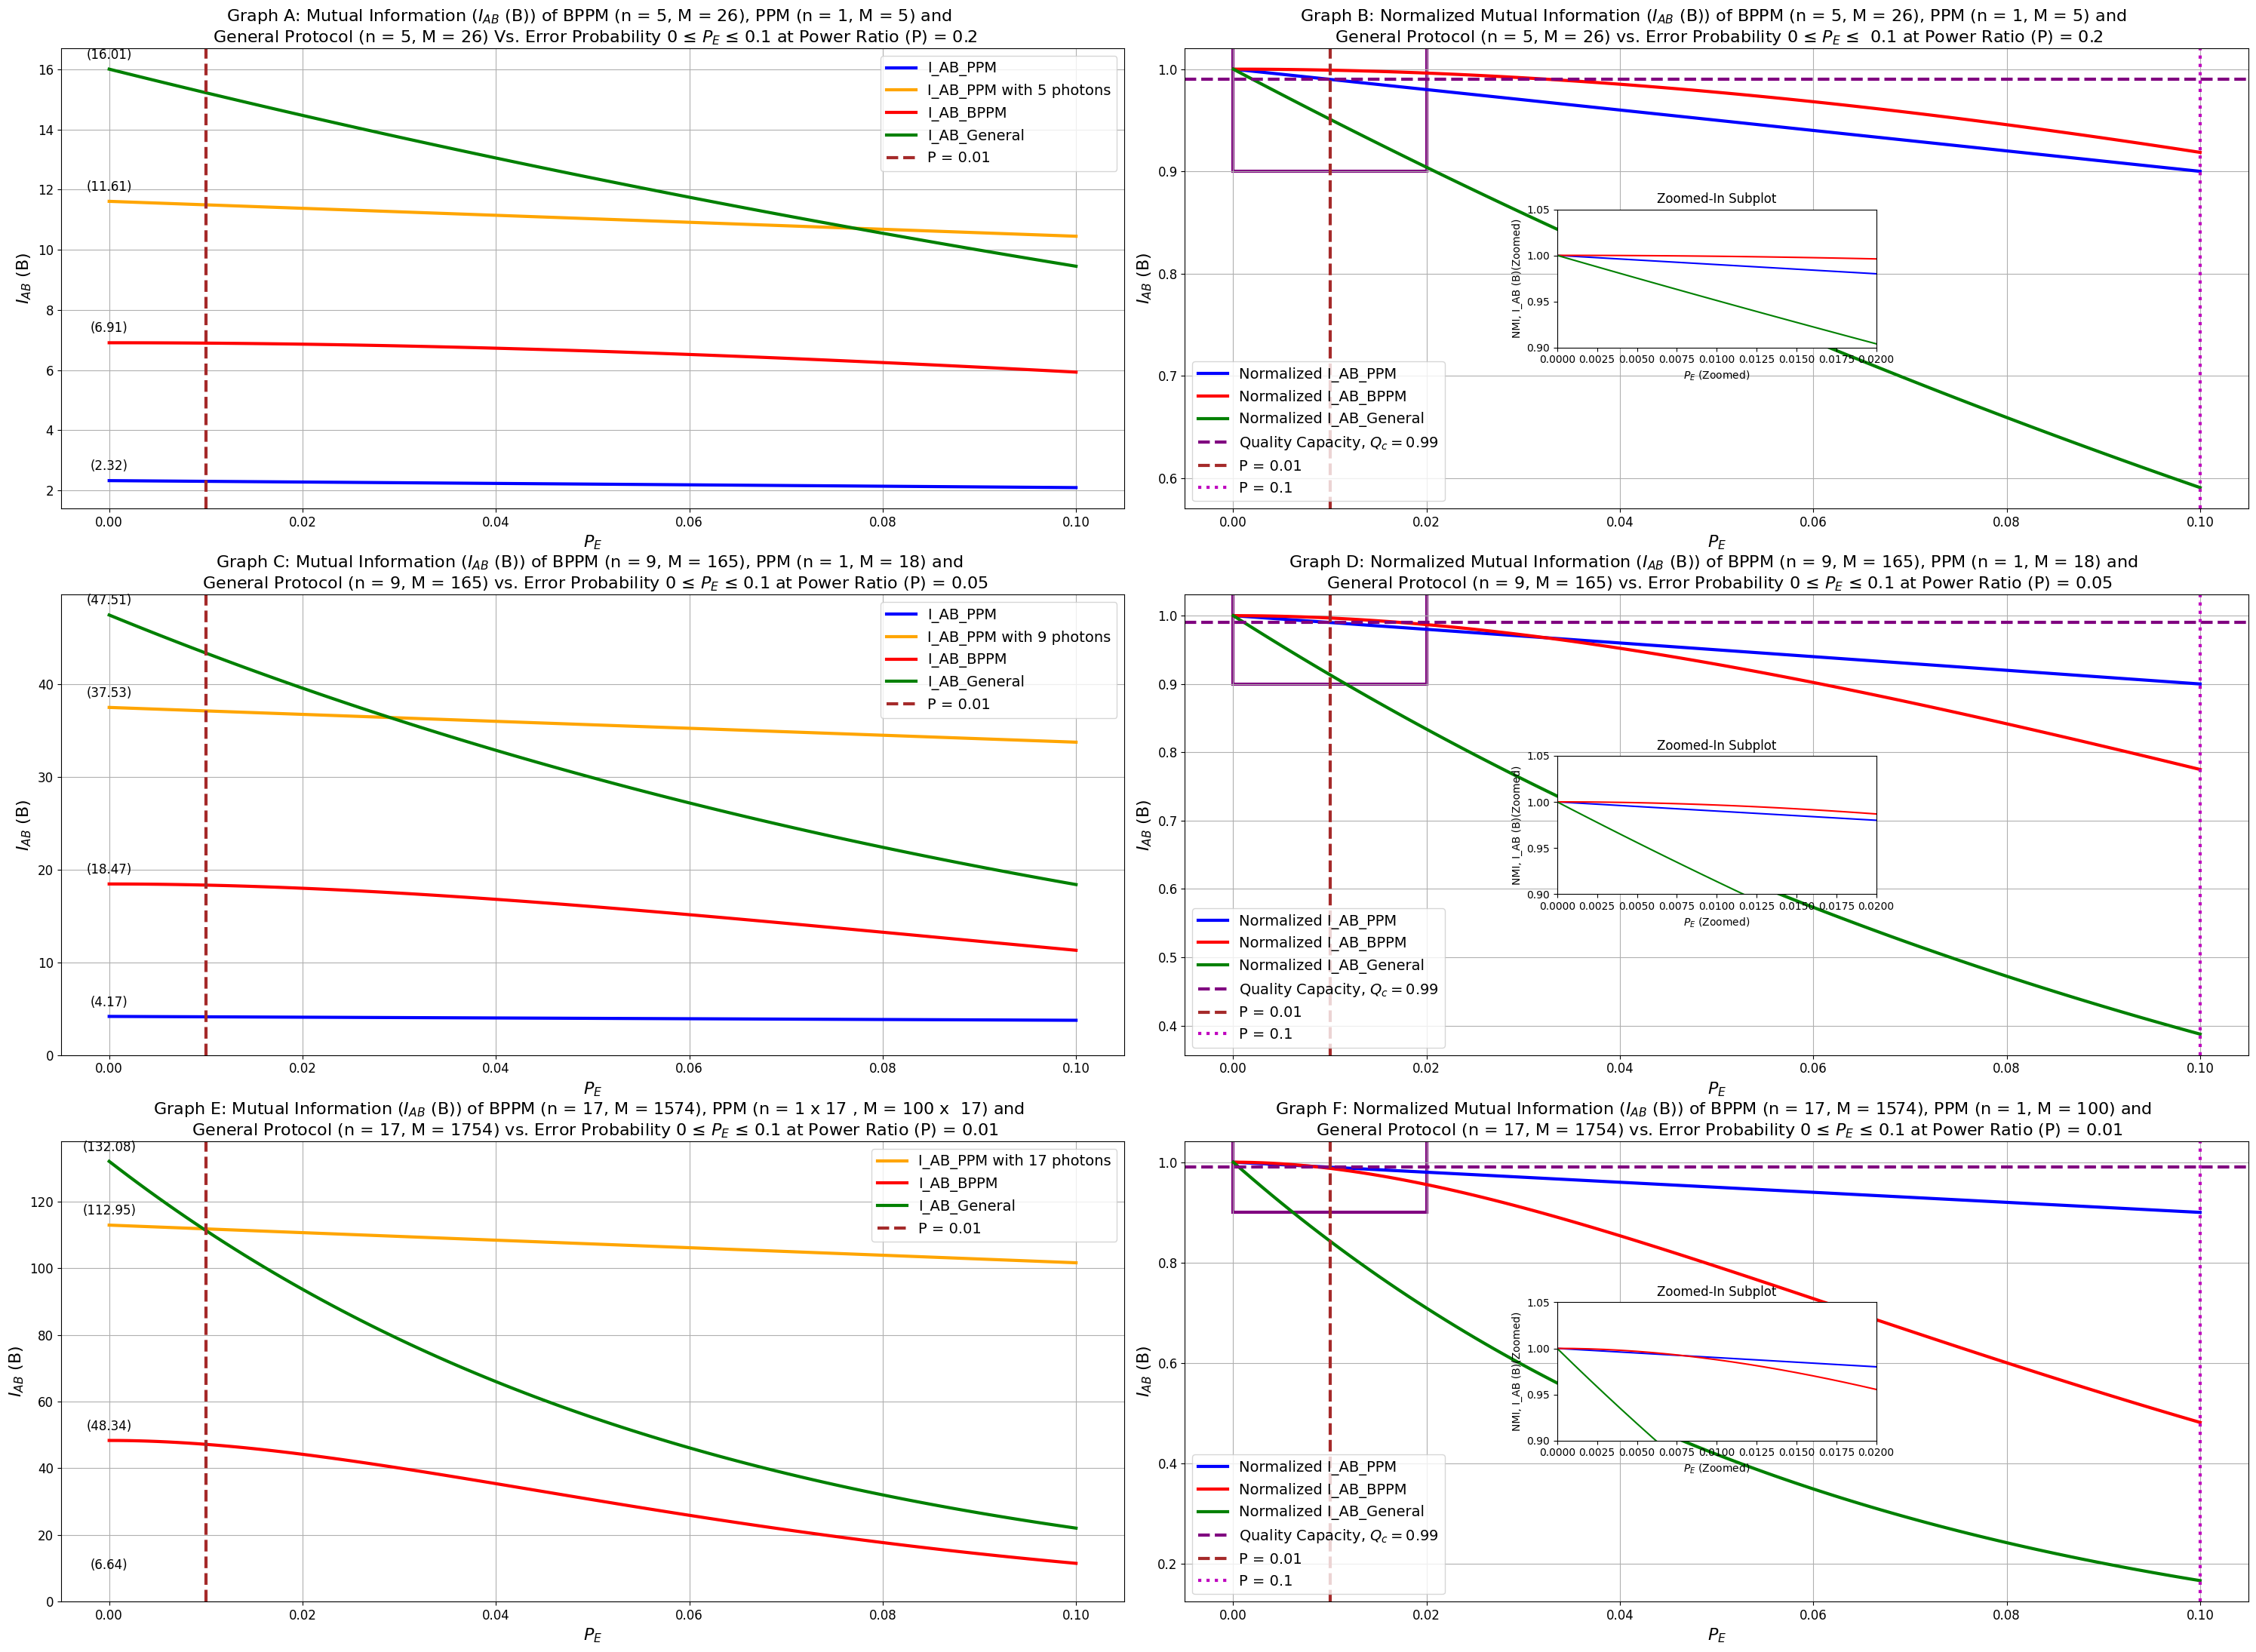

In [34]:
figure, axis = plt.subplots(3,2,figsize=(30,22))

x_zoomed = [0.00, 0.02]
y_zoomed = [0.90, 1.05]

first_point_x = P_list_0_1[0]

first_point_5_PPM = I_AB_PPM_list_5_0_1[0]
first_point_PPM_5 = I_AB_PPM_list_5_0_1_5[0]

first_point_9_PPM = I_AB_PPM_list_9_0_1[0]
first_point_PPM_9 = I_AB_PPM_list_9_0_1_9[0]

first_point_17_PPM = I_AB_PPM_list_17_0_1[0]
first_point_PPM_17 = I_AB_PPM_list_17_0_1_17[0]

first_point_BPPM_5 = I_AB_BPPM_list_5_0_1[0]
first_point_General_5 = I_AB_General_list_5_0_1[0]

first_point_BPPM_9 = I_AB_BPPM_list_9_0_1[0]
first_point_General_9 = I_AB_General_list_9_0_1[0]

first_point_BPPM_17 = I_AB_BPPM_list_17_0_1[0]
first_point_General_17 = I_AB_General_list_17_0_1[0]

rect_01 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')
rect_11 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')
rect_21 = patches.Rectangle((x_zoomed[0], y_zoomed[0]), x_zoomed[1] - x_zoomed[0], y_zoomed[1] - y_zoomed[0], linewidth=3, edgecolor='purple', facecolor='none')


axis[0, 0].plot(P_list_0_1, I_AB_PPM_list_5_0_1, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, I_AB_PPM_list_5_0_1_5, label='I_AB_PPM with 5 photons', color ='orange', linewidth=3, alpha=1)

axis[0, 0].plot(P_list_0_1, I_AB_BPPM_list_5_0_1, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, I_AB_General_list_5_0_1, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[0, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 0].set_title('Graph A: Mutual Information ($I_{AB}$ (B)) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.2', fontsize=16)
axis[0, 0].set_xlabel('$P_E$', fontsize = 16)
axis[0, 0].set_ylabel('$I_{AB}$ (B)', fontsize=16)
axis[0, 0].tick_params(axis='x', labelsize=12)
axis[0, 0].tick_params(axis='y', labelsize=12)

axis[0, 0].annotate(f'({first_point_5_PPM:.2f})', (first_point_x, first_point_5_PPM), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[0, 0].annotate(f'({first_point_PPM_5:.2f})', (first_point_x, first_point_PPM_5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)

axis[0, 0].annotate(f'({first_point_BPPM_5:.2f})', (first_point_x, first_point_BPPM_5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[0, 0].annotate(f'({first_point_General_5:.2f})', (first_point_x, first_point_General_5), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)

axis[0, 0].legend(fontsize=14)
axis[0, 0].grid(True)

axis[0, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_5_0_1, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_5_0_1, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_General_list_5_0_1, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)
axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$',linestyle='--', color='purple', linewidth=3, alpha=1)
axis[0, 1].axvline(x=0.01, label='P = 0.01', color='brown', linewidth=3, linestyle='--', alpha=1)
axis[0, 1].axvline(x=0.1, label='P = 0.1', color='m', linewidth=3, linestyle=':', alpha=1)
axis[0, 1].set_title('Graph B: Normalized Mutual Information ($I_{AB}$ (B)) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 5, M = 26) vs. Error Probability 0 \u2264 $P_E$ \u2264  0.1 at Power Ratio (P) = 0.2', fontsize=16)
axis[0, 1].set_xlabel('$P_E$', fontsize = 16)
axis[0, 1].set_ylabel('$I_{AB}$ (B)', fontsize=16)
axis[0, 1].tick_params(axis='x', labelsize=12)
axis[0, 1].tick_params(axis='y', labelsize=12)

axins = inset_axes(axis[0,1], width='30%', height='30%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list_0_1, Normalized_I_AB_PPM_list_5_0_1, label='Zoomed In', color='blue')
axins.plot(P_list_0_1, Normalized_I_AB_BPPM_list_5_0_1, label='Zoomed In', color='red')
axins.plot(P_list_0_1, Normalized_I_AB_General_list_5_0_1, label='Zoomed In', color='green')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')

axis[0, 1].add_patch(rect_01)

axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14, loc ='lower left')



axis[1, 0].plot(P_list_0_1, I_AB_PPM_list_9_0_1, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, I_AB_PPM_list_9_0_1_9, label='I_AB_PPM with 9 photons', color ='orange', linewidth=3, alpha=1)

axis[1, 0].plot(P_list_0_1, I_AB_BPPM_list_9_0_1, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, I_AB_General_list_9_0_1, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[1, 0].set_title('Graph C: Mutual Information ($I_{AB}$ (B)) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 9, M = 165) vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.05', fontsize=16)
axis[1, 0].set_xlabel('$P_E$', fontsize = 16)
axis[1, 0].set_ylabel('$I_{AB}$ (B)', fontsize=16)
axis[1, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 0].set_ylim(0)
axis[1, 0].tick_params(axis='x', labelsize=12)
axis[1, 0].tick_params(axis='y', labelsize=12)
axis[1, 0].annotate(f'({first_point_9_PPM:.2f})', (first_point_x, first_point_9_PPM), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[1, 0].annotate(f'({first_point_PPM_9:.2f})', (first_point_x, first_point_PPM_9), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[1, 0].annotate(f'({first_point_BPPM_9:.2f})', (first_point_x, first_point_BPPM_9), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[1, 0].annotate(f'({first_point_General_9:.2f})', (first_point_x, first_point_General_9), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_9_0_1, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_9_0_1, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_General_list_9_0_1, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)

axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=3, alpha=1)
axis[1, 1].set_title('Graph D: Normalized Mutual Information ($I_{AB}$ (B)) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 9, M = 165) vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.05', fontsize=16)
axis[1, 1].set_xlabel('$P_E$', fontsize = 16)
axis[1, 1].set_ylabel('$I_{AB}$ (B)', fontsize=16)

axins = inset_axes(axis[1,1], width='30%', height='30%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list_0_1, Normalized_I_AB_PPM_list_9_0_1, label='Zoomed In', color='blue')
axins.plot(P_list_0_1, Normalized_I_AB_BPPM_list_9_0_1, label='Zoomed In', color='red')
axins.plot(P_list_0_1, Normalized_I_AB_General_list_9_0_1, label='Zoomed In', color='green')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')

axis[1, 1].tick_params(axis='x', labelsize=12)
axis[1, 1].tick_params(axis='y', labelsize=12)
axis[1, 1].add_patch(rect_11)

axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14, loc = 'lower left')



# axis[2, 0].plot(P_list_0_1, I_AB_PPM_list_17_0_1, label='I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[2, 0].plot(P_list_0_1, I_AB_PPM_list_17_0_1_17, label='I_AB_PPM with 17 photons', color ='orange', linewidth=3, alpha=1)

axis[2, 0].plot(P_list_0_1, I_AB_BPPM_list_17_0_1, label='I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[2, 0].plot(P_list_0_1, I_AB_General_list_17_0_1, label='I_AB_General', color ='green', linewidth=3, alpha=1)
axis[2, 0].set_title('Graph E: Mutual Information ($I_{AB}$ (B)) of BPPM (n = 17, M = 1574), PPM (n = 1 x 17 , M = 100 x  17) and  \n General Protocol (n = 17, M = 1754) vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.01', fontsize=16)
axis[2, 0].set_xlabel('$P_E$', fontsize = 16)
axis[2, 0].set_ylabel('$I_{AB}$ (B)', fontsize=16)
axis[2, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 0].set_ylim(0)
axis[2, 0].tick_params(axis='x', labelsize=12)
axis[2, 0].tick_params(axis='y', labelsize=12)

axis[2, 0].annotate(f'({first_point_17_PPM:.2f})', (first_point_x, first_point_17_PPM), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[2, 0].annotate(f'({first_point_PPM_17:.2f})', (first_point_x, first_point_PPM_17), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)

axis[2, 0].annotate(f'({first_point_BPPM_17:.2f})', (first_point_x, first_point_BPPM_17), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)
axis[2, 0].annotate(f'({first_point_General_17:.2f})', (first_point_x, first_point_General_17), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = 12)

axis[2, 0].grid(True)
axis[2, 0].legend(fontsize=14)

axis[2, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_17_0_1, label='Normalized I_AB_PPM', color ='blue', linewidth=3, alpha=1)
axis[2, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_17_0_1, label='Normalized I_AB_BPPM', color ='red', linewidth=3, alpha=1)
axis[2, 1].plot(P_list_0_1, Normalized_I_AB_General_list_17_0_1, label='Normalized I_AB_General', color ='green', linewidth=3, alpha=1)
axis[2, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=3, alpha=1)
axis[2, 1].set_title('Graph F: Normalized Mutual Information ($I_{AB}$ (B)) of BPPM (n = 17, M = 1574), PPM (n = 1, M = 100) and  \n General Protocol (n = 17, M = 1754) vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.01', fontsize=16)
axis[2, 1].set_xlabel('$P_E$', fontsize = 16)
axis[2, 1].set_ylabel('$I_{AB}$ (B)', fontsize=16)
axis[2, 1].tick_params(axis='x', labelsize=12)
axis[2, 1].tick_params(axis='y', labelsize=12)


axins = inset_axes(axis[2,1], width='30%', height='30%', loc='center')
axins.set_title('Zoomed-In Subplot', fontsize=12)
axins.plot(P_list_0_1, Normalized_I_AB_PPM_list_17_0_1, label='Zoomed In', color='blue')
axins.plot(P_list_0_1, Normalized_I_AB_BPPM_list_17_0_1, label='Zoomed In', color='red')
axins.plot(P_list_0_1, Normalized_I_AB_General_list_17_0_1, label='Zoomed In', color='green')
axins.set_xlim(x_zoomed)
axins.set_ylim(y_zoomed)
axins.set_ylabel('NMI, I_AB (B)(Zoomed)')
axins.set_xlabel('$P_E$ (Zoomed)')

axis[2, 1].add_patch(rect_21)
axis[2, 1].grid(True)
axis[2, 1].legend(fontsize=14)

plt.tight_layout(h_pad=0.25)

figure.set_facecolor("white")
# plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

# take away rthe blue curve

General protocol has largest MI at low P_e. However,  at larger P_E PPM has better performance. The reason for higer error susceptiblilty of the general format contains more 1s than PPM does. 

17 photons per symbols

Mi decrease slower for BPPM

same solor curve for all protocols
same color code for each protocols

last picture, with OOK in the legend



In [35]:
MI_list = []
K_list = [5,18,100]
for K in K_list:
    MI = np.log2(K)
    MI_list.append(MI)
MI_list

[2.321928094887362, 4.169925001442312, 6.643856189774724]

## Mutual Information per Number of Time Bin

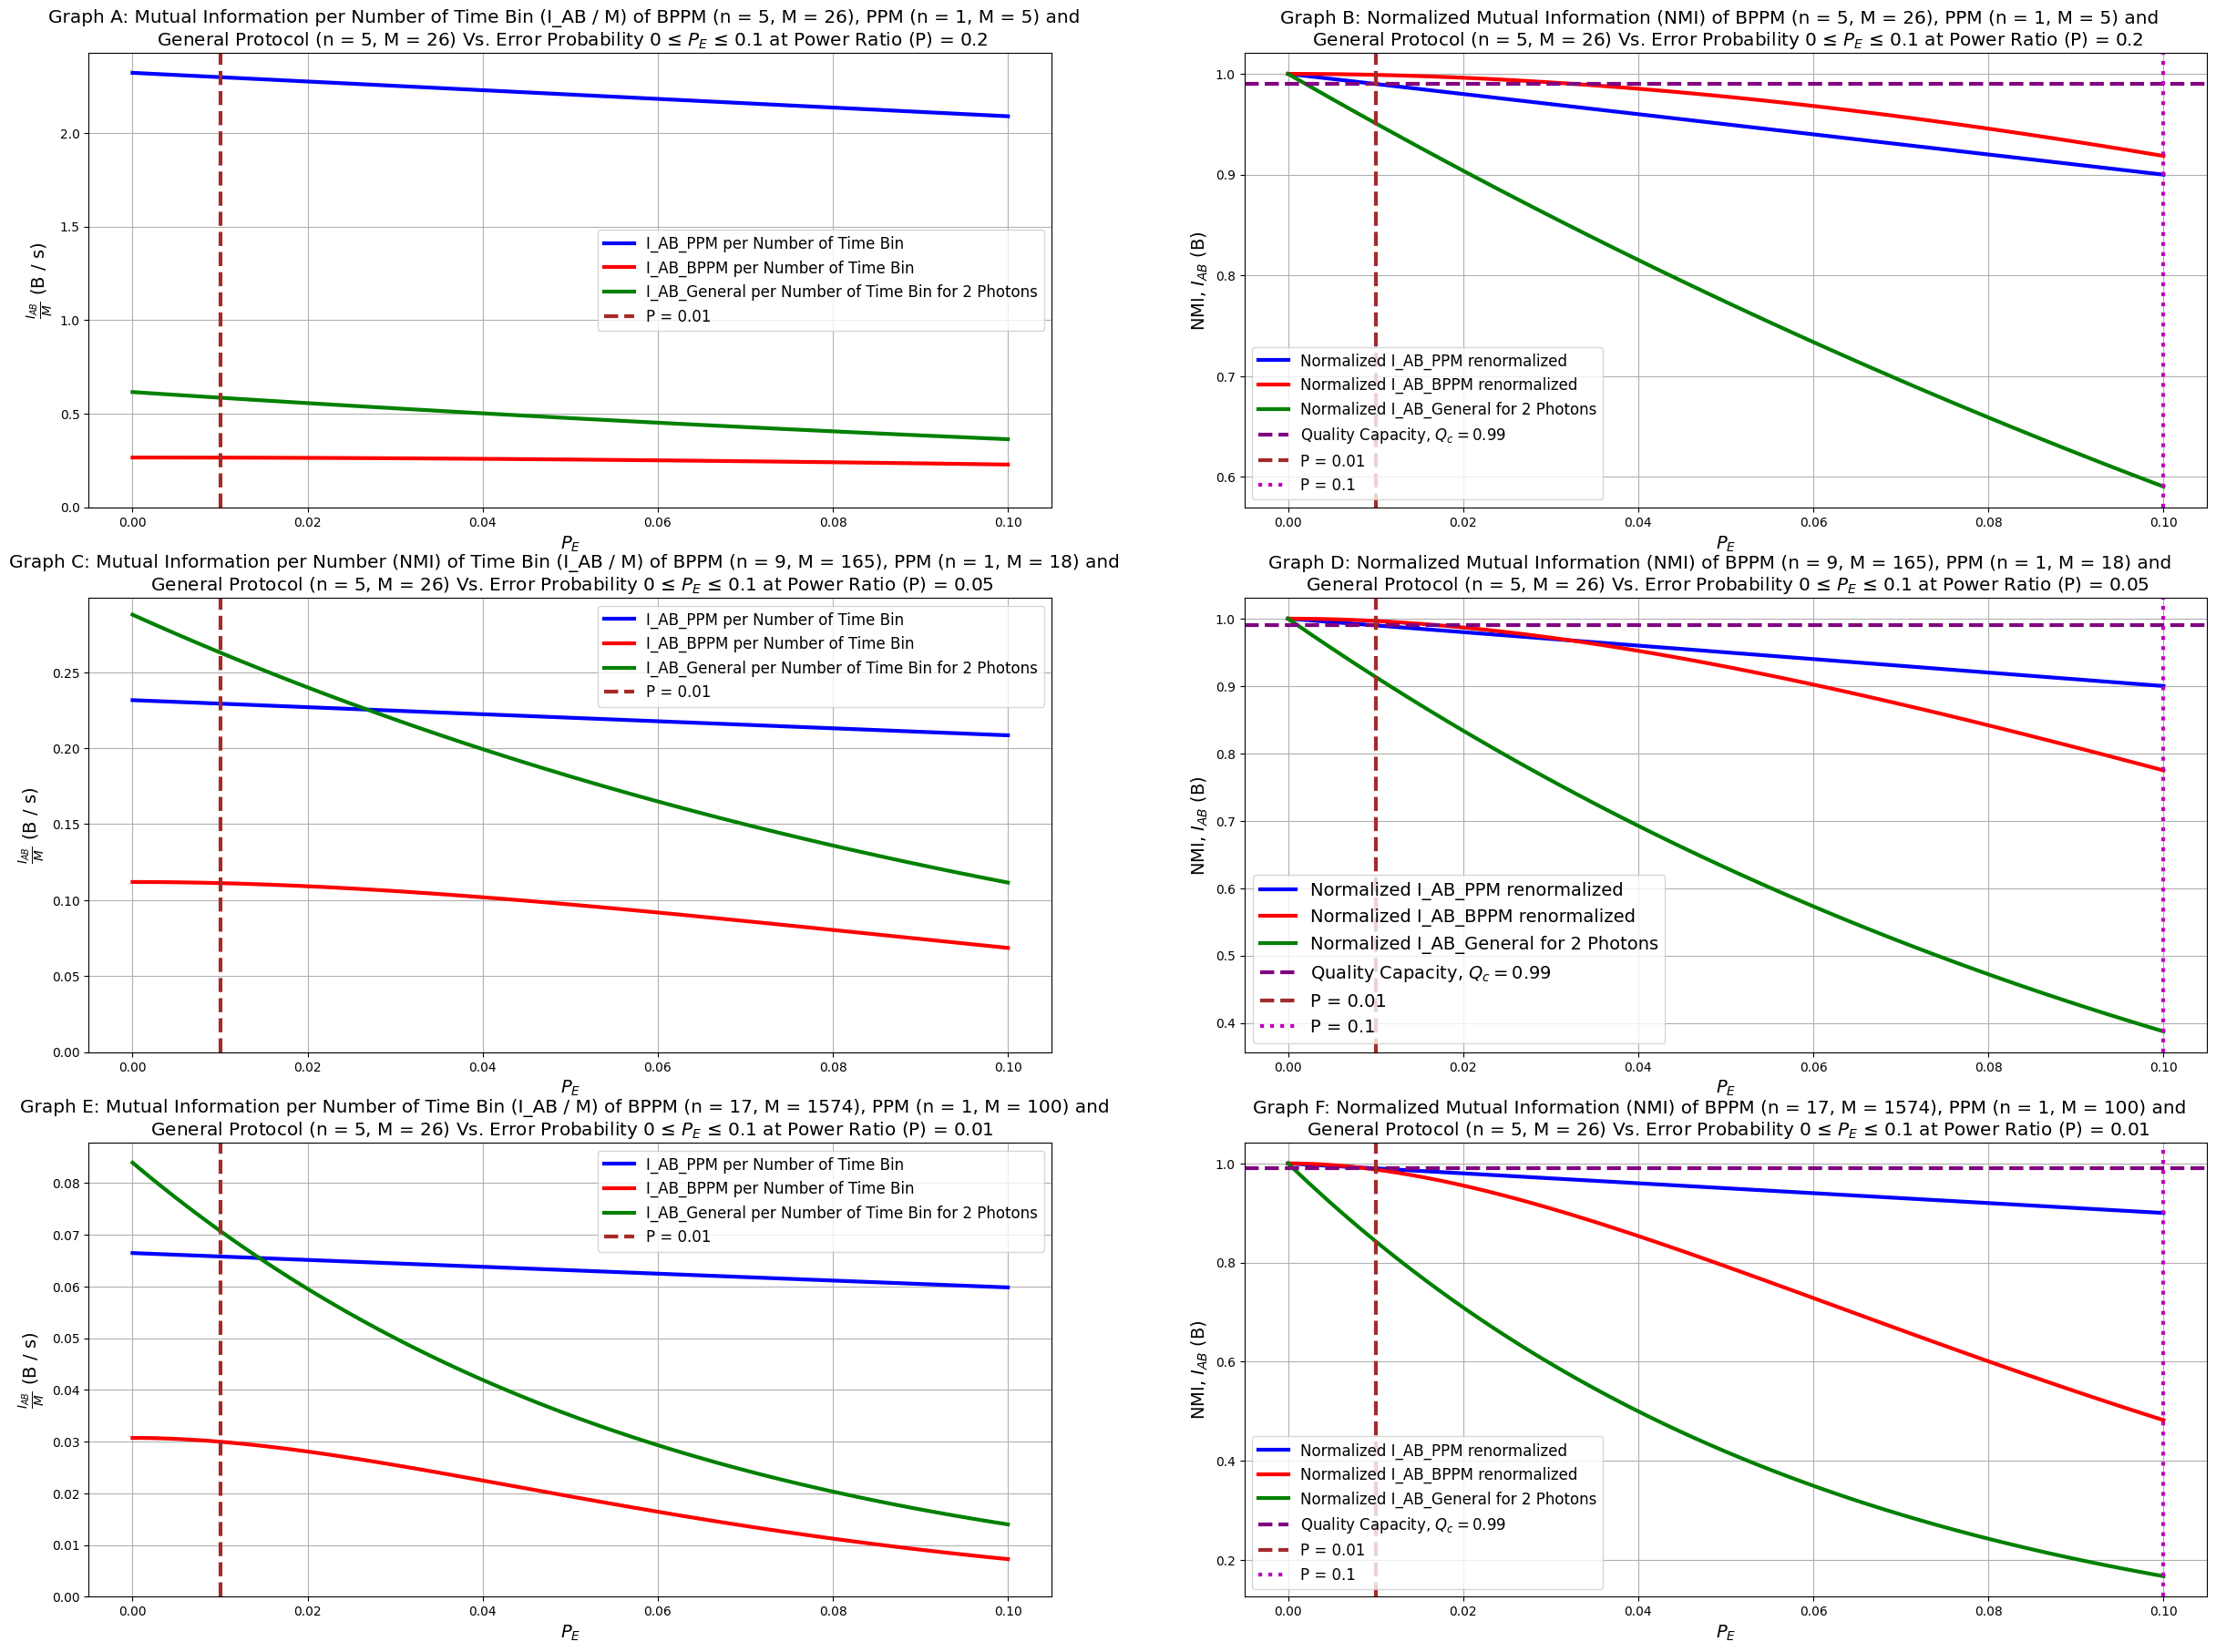

In [29]:
figure, axis = plt.subplots(3,2,figsize=(30,22))

axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_PPM_list_5_0_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_BPPM_list_5_0_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_0_1, IperTimeBin_AB_General_list_5_0_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 0].set_title('Graph A: Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.2 ', fontsize='x-large')
axis[0, 0].set_xlabel('$P_E$', fontsize = 14)
axis[0, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[0, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_5_0_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_5_0_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_0_1, Normalized_I_AB_General_list_5_0_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$',linestyle='--', color='purple', linewidth=3, alpha=1)
axis[0, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=3, alpha=1)
axis[0, 1].set_title('Graph B: Normalized Mutual Information (NMI) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.2 ', fontsize='x-large')
axis[0, 1].set_xlabel('$P_E$', fontsize = 14)
axis[0, 1].set_ylabel('NMI, $I_{AB}$ (B)', fontsize=14)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=12)

axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_PPM_list_9_0_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_BPPM_list_9_0_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_0_1, IperTimeBin_AB_General_list_9_0_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 0].set_title('Graph C: Mutual Information per Number (NMI) of Time Bin (I_AB / M) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.05 ', fontsize='x-large')
axis[1, 0].set_xlabel('$P_E$', fontsize = 14)
axis[1, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[1, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=12)

axis[1, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_9_0_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_9_0_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_0_1, Normalized_I_AB_General_list_9_0_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[1, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=3, alpha=1)
axis[1, 1].set_title('Graph D: Normalized Mutual Information (NMI) of BPPM (n = 9, M = 165), PPM (n = 1, M = 18) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.05 ', fontsize='x-large')
axis[1, 1].set_xlabel('$P_E$', fontsize = 14)
axis[1, 1].set_ylabel('NMI, $I_{AB}$ (B)', fontsize=14)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

axis[2, 0].plot(P_list_0_1, IperTimeBin_AB_PPM_list_17_0_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[2, 0].plot(P_list_0_1, IperTimeBin_AB_BPPM_list_17_0_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[2, 0].plot(P_list_0_1, IperTimeBin_AB_General_list_17_0_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[2, 0].set_title('Graph E: Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 17, M = 1574), PPM (n = 1, M = 100) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.01 ', fontsize='x-large')
axis[2, 0].set_xlabel('$P_E$', fontsize = 14)
axis[2, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[2, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 0].set_ylim(0)
axis[2, 0].grid(True)
axis[2, 0].legend(fontsize=12)

axis[2, 1].plot(P_list_0_1, Normalized_I_AB_PPM_list_17_0_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[2, 1].plot(P_list_0_1, Normalized_I_AB_BPPM_list_17_0_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[2, 1].plot(P_list_0_1, Normalized_I_AB_General_list_17_0_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)
axis[2, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[2, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=3, alpha=1)
axis[2, 1].set_title('Graph F: Normalized Mutual Information (NMI) of BPPM (n = 17, M = 1574), PPM (n = 1, M = 100) and  \n General Protocol (n = 5, M = 26) Vs. Error Probability 0 \u2264 $P_E$ \u2264 0.1 at Power Ratio (P) = 0.01', fontsize='x-large')
axis[2, 1].set_xlabel('$P_E$', fontsize = 14)
axis[2, 1].set_ylabel('NMI, $I_{AB}$ (B)', fontsize=14)
axis[2, 1].grid(True)
axis[2, 1].legend(fontsize=12)

figure.set_facecolor("white")
# plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

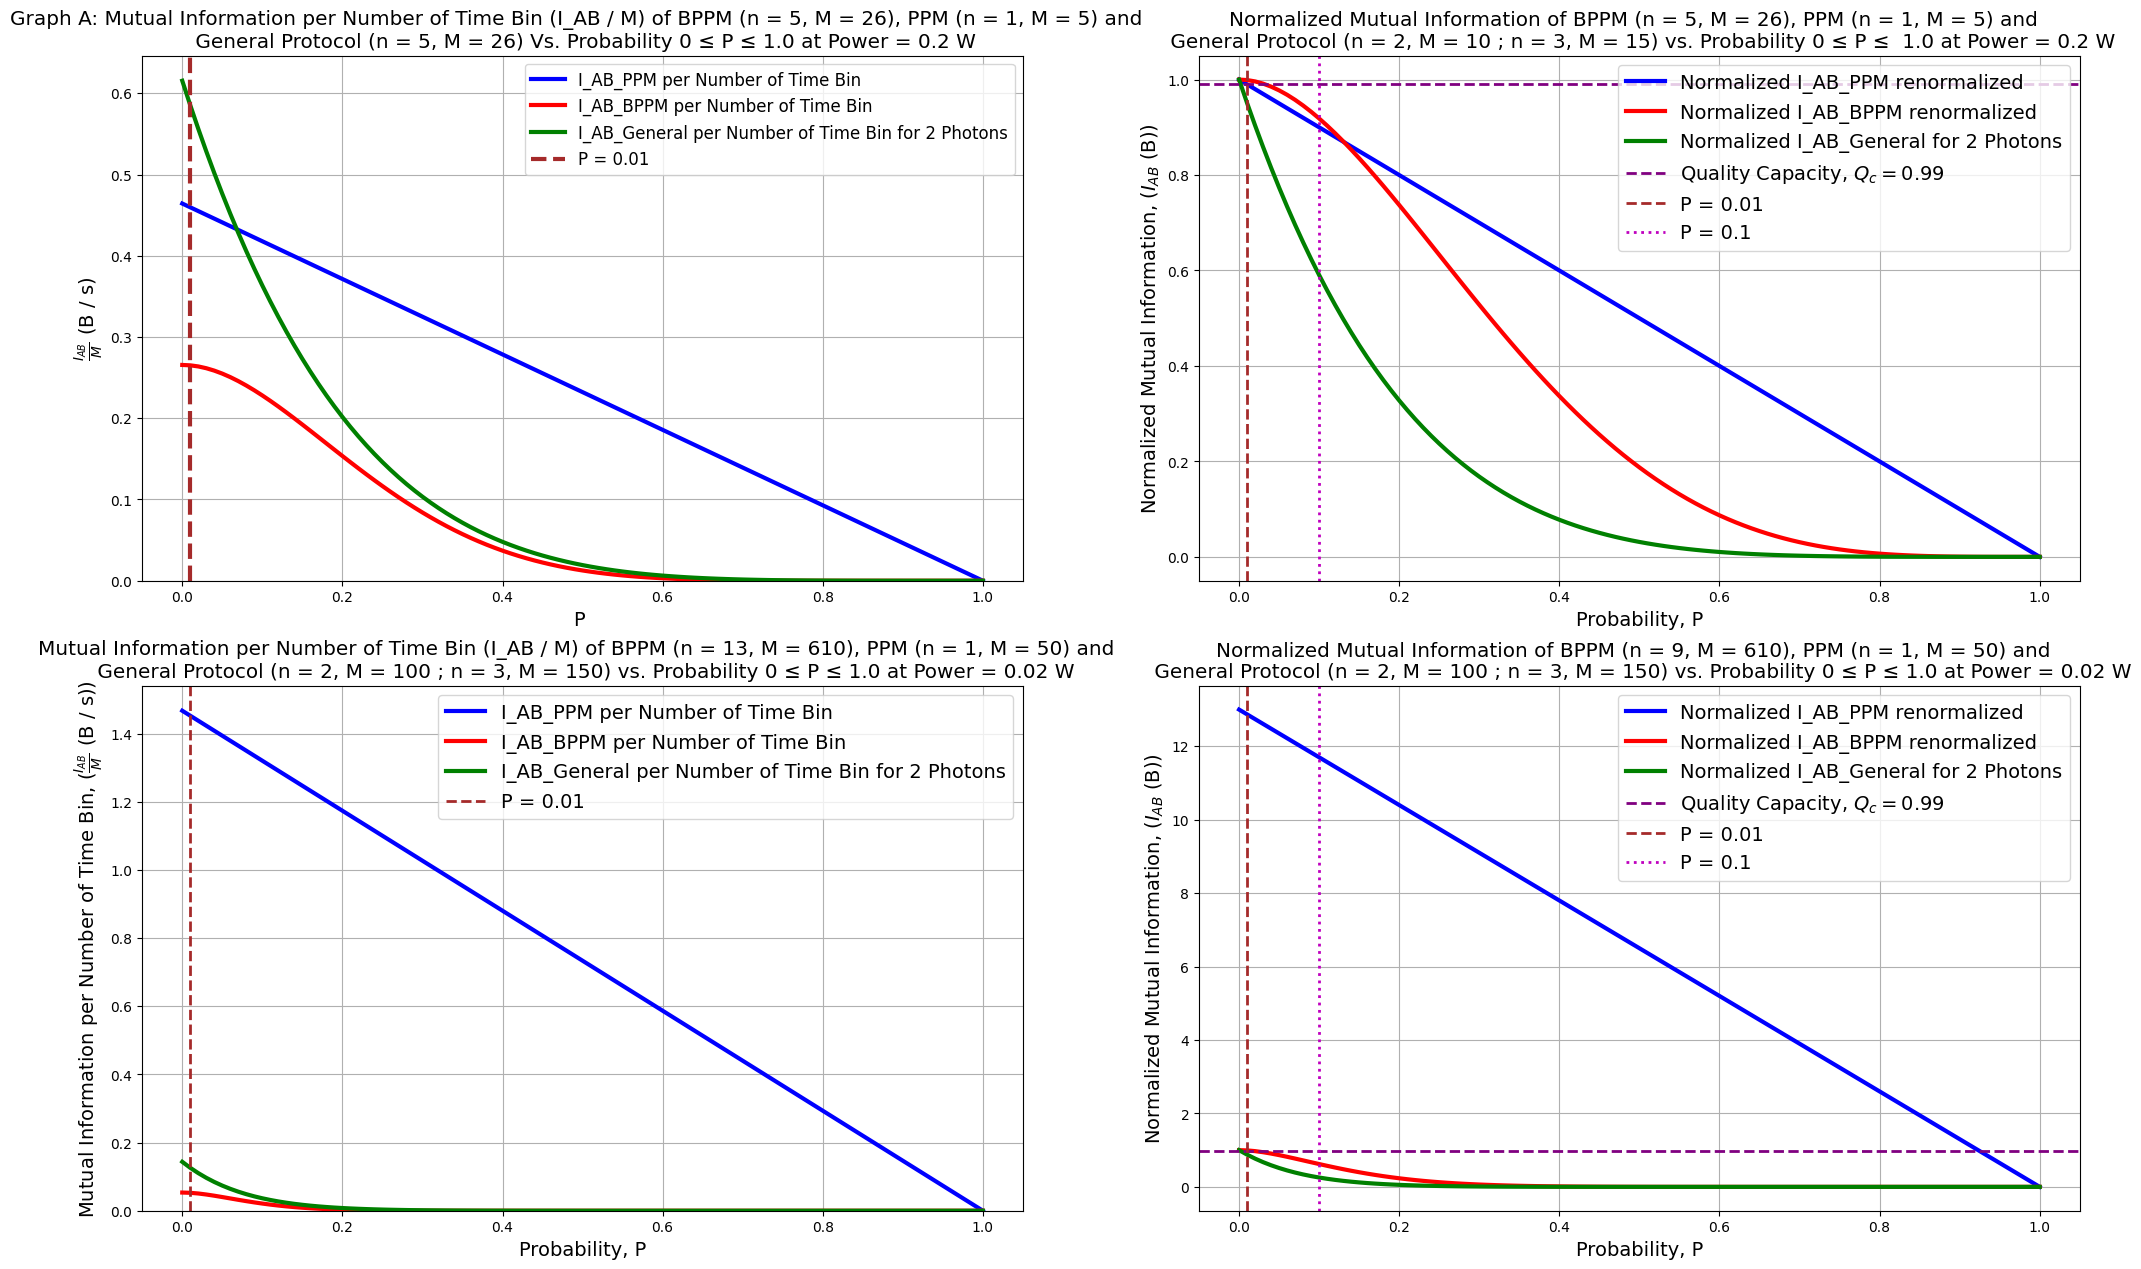

In [30]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(P_list_1, IperTimeBin_AB_PPM_list_5_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_1, IperTimeBin_AB_BPPM_list_5_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[0, 0].plot(P_list_1, IperTimeBin_AB_General_list_5_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)

axis[0, 0].set_title('Graph A: Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 5, M = 26) Vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.2 W', fontsize='x-large')
axis[0, 0].set_xlabel('P ', fontsize = 14)
axis[0, 0].set_ylabel('$\\frac{I_{AB}}{M}$ (B / s)', fontsize=14)
axis[0, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=3, alpha=1)
axis[0, 0].set_ylim(0)
axis[0, 0].grid(True)
axis[0, 0].legend(fontsize=12)

axis[0, 1].plot(P_list_1, Normalized_I_AB_PPM_list_5_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_1, Normalized_I_AB_BPPM_list_5_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[0, 1].plot(P_list_1, Normalized_I_AB_General_list_5_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)

axis[0, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$',linestyle='--', color='purple', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[0, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=2, alpha=1)
axis[0, 1].set_title('Normalized Mutual Information of BPPM (n = 5, M = 26), PPM (n = 1, M = 5) and  \n General Protocol (n = 2, M = 10 ; n = 3, M = 15) vs. Probability 0 \u2264 P \u2264  1.0 at Power = 0.2 W', fontsize='x-large')
axis[0, 1].set_xlabel('Probability, P', fontsize = 14)
axis[0, 1].set_ylabel('Normalized Mutual Information, ($I_{AB}$ (B))', fontsize=14)
axis[0, 1].grid(True)
axis[0, 1].legend(fontsize=14)

axis[1, 0].plot(P_list_1, IperTimeBin_AB_PPM_list_13_1, label='I_AB_PPM per Number of Time Bin', color ='blue', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_1, IperTimeBin_AB_BPPM_list_13_1, label='I_AB_BPPM per Number of Time Bin', color ='red', linewidth=3, alpha=1)
axis[1, 0].plot(P_list_1, IperTimeBin_AB_General_list_13_1, label='I_AB_General per Number of Time Bin for 2 Photons', color ='green', linewidth=3, alpha=1)

axis[1, 0].set_title('Mutual Information per Number of Time Bin (I_AB / M) of BPPM (n = 13, M = 610), PPM (n = 1, M = 50) and  \n General Protocol (n = 2, M = 100 ; n = 3, M = 150) vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.02 W', fontsize='x-large')
axis[1, 0].set_xlabel('Probability, P', fontsize = 14)
axis[1, 0].set_ylabel('Mutual Information per Number of Time Bin, ($\\frac{I_{AB}}{M}$ (B / s))', fontsize=14)
axis[1, 0].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 0].set_ylim(0)
axis[1, 0].grid(True)
axis[1, 0].legend(fontsize=14)

axis[1, 1].plot(P_list_1, Normalized_I_AB_PPM_list_13_1, label='Normalized I_AB_PPM renormalized', color ='blue', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_1, Normalized_I_AB_BPPM_list_13_1, label='Normalized I_AB_BPPM renormalized', color ='red', linewidth=3, alpha=1)
axis[1, 1].plot(P_list_1, Normalized_I_AB_General_list_13_1, label='Normalized I_AB_General for 2 Photons', color ='green', linewidth=3, alpha=1)

axis[1, 1].axhline(y=0.99, label='Quality Capacity, $Q_c = 0.99$', linestyle='--', color='purple', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.01, label='P = 0.01', linestyle='--', color='brown', linewidth=2, alpha=1)
axis[1, 1].axvline(x=0.1, label='P = 0.1', linestyle=':', color='m', linewidth=2, alpha=1)
axis[1, 1].set_title('Normalized Mutual Information of BPPM (n = 9, M = 610), PPM (n = 1, M = 50) and  \n General Protocol (n = 2, M = 100 ; n = 3, M = 150) vs. Probability 0 \u2264 P \u2264 1.0 at Power = 0.02 W', fontsize='x-large')
axis[1, 1].set_xlabel('Probability, P', fontsize = 14)
axis[1, 1].set_ylabel('Normalized Mutual Information, ($I_{AB}$ (B))', fontsize=14)
axis[1, 1].grid(True)
axis[1, 1].legend(fontsize=14)

figure.set_facecolor("white")
# plt.savefig('protocol/MI_Power_4schemes_Plot.png', dpi=450, bbox_inches='tight')
plt.show()